In [1]:
from typing import Callable
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math

# Явные методы Рунге - Кутта

## Метод Хойна

Метод Хойна является 3-х стадийным явным методом Рунге-Кутта со следующей таблицей Бутчера
|     |     |     |     |
|-----|-----|-----|-----|
| 0   | 0   | 0   | 0   |
| 1/3 | 1/3 | 0   | 0   |
| 2/3 | 0   | 2/3 | 0   |
|     | 1/4 | 0   | 3/4 |



In [2]:
def func(t, x):
    return np.array([x[1], -np.sin(x[0])])

In [3]:
def methodHeuns(func, numberPoints, interval, init, tabButch, numberStage):
    y = np.zeros((numberPoints, 2))
    y[0] = init
    
    dt = interval[1] / (numberPoints - 1)
    t = np.zeros(numberPoints)
    for i in range(numberPoints):
        t[i] = interval[0] + i * dt
    
    r = np.zeros(numberPoints)
    
    for i in range(numberPoints - 1):
        Y = np.full(np.array([numberStage,2]), y[i])        
        T = np.full(numberStage, t[i])
        for k in range(numberStage):
            T[k] += tabButch[k][0] * dt
            for j in range(1, k + 1):
                Y[k] += dt * tabButch[k][j] * func(T[j - 1], Y[j - 1])
        
        y[i + 1] = y[i]        
        for k in range(numberStage):
            y[i + 1] += dt * tabButch[numberStage - 1][k + 1] * func(T[k], Y[k])
            
        r[i] = math.dist(y[i], y[0])
            
    r = r[0:-2]
    
    return r, y

Проверка

In [4]:
tab = [
    [0  , 0  , 0  , 0  ],
    [1/3, 1/3, 0  , 0  ],
    [2/3, 0  , 2/3, 0  ],
    [0  , 1/4, 0  , 3/4]
]

interval = [0, 1.854]
nP = 100
initial = np.array([np.pi / 2, 0])
nS = 3

r, u = methodHeuns(func, nP, interval, initial, tab, nS)

In [5]:
dt = interval[1] / (nP - 1)
t = np.zeros(nP, dtype=np.float64)
for i in range(nP):
    t[i] = interval[0] + i * dt

## Порядок сходиомости

Text(0, 0.5, 'error')

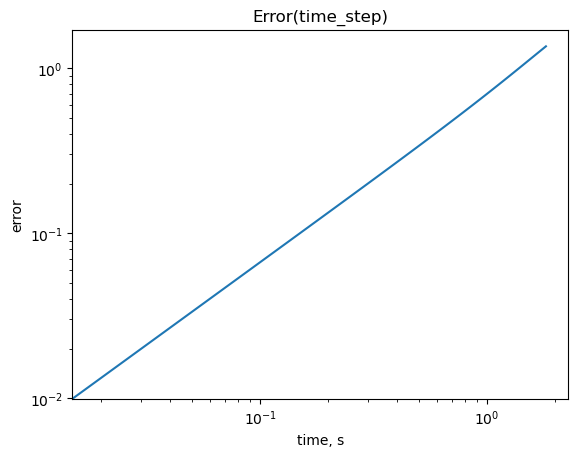

In [6]:
tt = t[0:-2]

plt.yscale("log")
plt.xscale("log")
plt.title("Error(time_step)")
plt.plot(tt, r, linestyle = '-')
plt.xlabel("time, s")
plt.ylabel("error")

Коэффициент наклона равен 1. Порядок апроксимации метода равен 2:

$$ (u_i + \Delta t u_i' + \Delta t^2 u_i''/2 + \Delta t^3 u_i'''/6 - u_i + \Delta t u_i' - \Delta t^2 u_i''/2 + \Delta t^3 u_i'''/6)/(2 \Delta t) - u_i' = \Delta t^2 u_i'''/6$$

## Фазовые диаграммы

In [10]:
alpha = u[0]
theta = u[1]

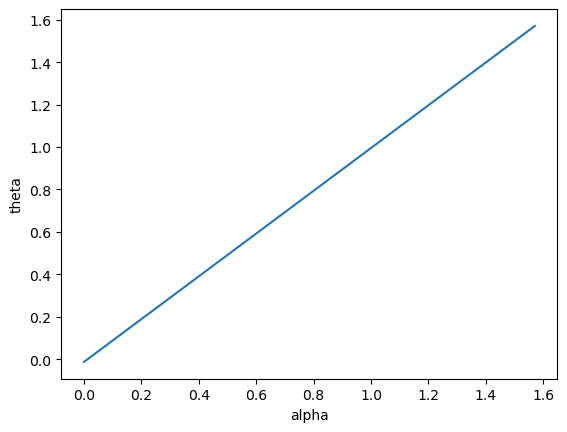

In [13]:
plt.plot(alpha, theta)
plt.xlabel("alpha")
plt.ylabel("theta")
plt.show()

## Исследование на устойчивость

Найдем $R(z)$ 
$$R(z) = \frac{det(E - zA + zeb^T)}{det(E - zA)} = 1 + z + \frac{z^2}{2} + \frac{z^3}{6}, $$
где E - единичная матрица, $b = (\frac{1}{4}, 0, \frac{3}{4})^T$, $e = (1, 1, 1)^T$,
$$ A = \begin{pmatrix} 0 & 0 & 0 \\ \frac{1}{3} & 0 & 0 \\ 0 & \frac{2}{3} & 0 \end{pmatrix} $$
Найдем область, где $|R(z)| \leq 1$. Получим следующую картину:  
![text](R(z).jpg "Область сходимости")